In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
house=fetch_california_housing()

In [8]:
house.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
house['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
house['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [14]:
y=pd.DataFrame(house['target'],columns=['target'])
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [16]:
x=pd.DataFrame(house['data'],columns=house.feature_names)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
x.shape

(20640, 8)

In [18]:
y.shape

(20640, 1)

In [19]:
x_train_full,x_test,y_train_full,y_test=train_test_split(x,y,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,random_state=42)

In [21]:
print(x_train_full.shape)
print(x_test.shape)
print(x_train.shape)
print(x_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


### Architecture used

In [22]:
### input layer-->8
### hidden layer1-->30
### hidden layer2-->10
### hidden layer3-->5
###output layer-->1

In [23]:
LAYERS=[
    tf.keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [24]:
model=tf.keras.models.Sequential(LAYERS)

In [25]:
LOSS='mse'
OPTIMIZER='sgd'

In [26]:
model.compile(loss=LOSS,optimizer=OPTIMIZER)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [27]:
scaler=StandardScaler()

In [28]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_valid=scaler.transform(x_valid)

In [32]:
EPOCH=40
history=model.fit(x_train,y_train,epochs=EPOCH,validation_data=(x_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 2s 6ms/step - loss: 0.3241 - val_loss: 0.3649
Epoch 2/40
363/363 [==============================] - 2s 5ms/step - loss: 0.3224 - val_loss: 0.3579
Epoch 3/40
363/363 [==============================] - 2s 6ms/step - loss: 0.3209 - val_loss: 0.3542
Epoch 4/40
363/363 [==============================] - 3s 9ms/step - loss: 0.3192 - val_loss: 0.3616
Epoch 5/40
363/363 [==============================] - 3s 9ms/step - loss: 0.3177 - val_loss: 0.3605
Epoch 6/40
363/363 [==============================] - 3s 8ms/step - loss: 0.3171 - val_loss: 0.3599
Epoch 7/40
363/363 [==============================] - 3s 9ms/step - loss: 0.3150 - val_loss: 0.3598
Epoch 8/40
363/363 [==============================] - 3s 7ms/step - loss: 0.3140 - val_loss: 0.3558
Epoch 9/40
363/363 [==============================] - 3s 8ms/step - loss: 0.3120 - val_loss: 0.3524
Epoch 10/40
363/363 [==============================] - 3s 7ms/step - loss: 0.3110 - val_loss: 0.3570

In [33]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.324127,0.364863
1,0.322374,0.357912
2,0.320920,0.354246
3,0.319189,0.361614
4,0.317688,0.360544
5,0.317062,0.359943
6,0.314962,0.359841
7,0.314011,0.355750
8,0.312036,0.352416
9,0.310957,0.356963


<AxesSubplot: >

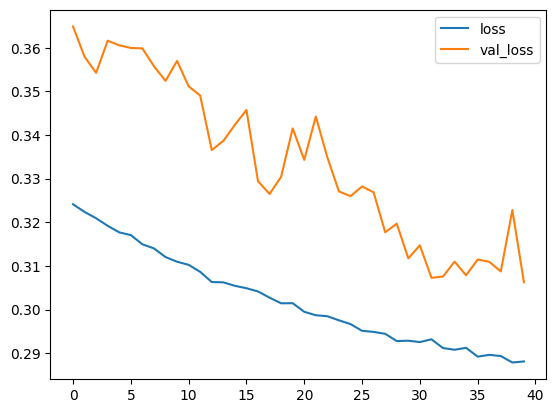

In [34]:
pd.DataFrame(history.history).plot()

In [35]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.2992


0.29915347695350647

In [36]:
x_test.shape

(5160, 8)

In [37]:
new=x_test[0]

In [38]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [39]:
new.shape

(8,)

In [40]:
x_test[0]

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [41]:
new.reshape((1,8)).shape

(1, 8)

In [43]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 105ms/step


array([[0.61430436]], dtype=float32)

##  Model with Callbacks:

In [45]:
model_2=tf.keras.models.Sequential(LAYERS)
LOSS='mse'
OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=0.001)

model_2.compile(loss=LOSS,optimizer=OPTIMIZER)

EPOCHS=20

checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir='logs')

CALLBACKS=[checkpoint_cb,early_stopping_cb,tensorboard_cb]

history=model_2.fit(x_train,y_train,epochs=EPOCHS,
                    validation_data=(x_valid,y_valid),
                   callbacks=CALLBACKS)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.2813 - val_loss: 0.3022
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.2799 - val_loss: 0.3017
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.2797 - val_loss: 0.3018
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.2797 - val_loss: 0.3012
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.2797 - val_loss: 0.3006
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.2794 - val_loss: 0.3007
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.2794 - val_loss: 0.3011
Epoch 8/20
363/363 [==============================] - 3s 9ms/step - loss: 0.2793 - val_loss: 0.3017
Epoch 9/20
363/363 [==============================] - 4s 10ms/step - loss: 0.2792 - val_loss: 0.3010
Epoch 10/20
363/363 [==============================] - 4s 10ms/step - loss: 0.2791 - val_loss: 0.30

In [46]:
%load_ext tensorboard

In [47]:
%tensorboard --logdir='logs'